** Final project code **

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import numpy as np
import pandas as pd
import pygsp as pg

In [85]:
from load_and_preprocessing import load_data_and_filter_members, assign_party_to_names
from visualization import label_to_numeric, get_lap_eigendecomp, detect_partitions, make_signal
from conseil_national_evolution import create_evolution_features_v1

In [4]:
# Use load_data_and_filter_members to create adjacency for any file from any legislature
# Example 
leg='49'
from_date = '01_01_2012'
to_date = '31_12_2012'
adjacency, node_index, sum_na_per_row = load_data_and_filter_members('../data/abdb-de-all-affairs-'+leg+'-0.csv',
                                                                     start_date=from_date, end_date=to_date,
                                                                     filter_method='number_NA',cutoff=10,ret_transf=False)

(Nbr. of councillors, nbr. of votes) before filter: (204, 419)
(Nbr. of councillors, nbr. of votes) after filter: (194, 418)


Assigning parties to the councillors from the dataset loaded above:

In [5]:
name_with_party = assign_party_to_names('../data/Ratsmitglieder_1848_FR.csv', node_index)
print(name_with_party.to_string())

1 councillors couldn't be associated to a party
         Counc_Id                  CouncillorName PartyAbbreviation
node_id                                                            
0             490              Lustenberger Ruedi               PDC
1            4025              Büchel Roland Rino               UDC
2             504                Rossini Stéphane               PSS
3            3922                   Favre Laurent               PLR
4            4092                    Poggia Mauro               MCR
5            1104                   Büchler Jakob               PDC
6            3911                      Voruz Eric               PSS
7            1295             Graf-Litscher Edith               PSS
8            4052                   Ritter Markus               PDC
9            3876                Estermann Yvette               UDC
10           4075                   Caroni Andrea               PLR
11           1112                     Müller Geri               PES


Make a csv that can be used in Gephi:

In [6]:
name_labels = name_with_party['CouncillorName'].values
adjacency_df = pd.DataFrame(data=adjacency, columns=name_labels, index=name_labels)
adjacency_df.to_csv('gephi_'+leg+'-'+from_date+'-'+to_date+'.csv', sep=',', index_label='', index=True, header=True)

Translating the party label into a numerical value:

In [7]:
# Example here is with parties, but the same function works for any kind of dictionary, eg. lobbying mandates
party_map = {'UDC': 6,'PSS': -6,'PDC':0,'BastA':-3,'PLR':5,'pvl':-2,
             'PES':-5, 'PBD':2, 'PdT':-4,'PLS':5,
             'PRD':5, 'MCR':4, 'PEV':-1, 'Lega':3, 'csp-ow':1, 'Al':-7,'FraP!':-8, 'GB':7, 'CSPO':8 }

name_with_party_num, labels_in_data = label_to_numeric(name_with_party, 'PartyAbbreviation', party_map, ret_values=True)

In [8]:
name_labels = name_with_party['CouncillorName'].values
d= name_with_party_num['PartyAbbreviation'].values
Party_attribute = pd.DataFrame(data=np.c_[name_labels,d], columns=['Id','party'])
Party_attribute.to_csv('gephi_'+leg+'-'+from_date+'-'+to_date+'party'+'.csv', sep=',',  index=False, header=True)

This can be used to see if the label dictionary needs to be adjusted:

In [9]:
print("Unique label values found in data: \n{0}".format(labels_in_data))
print("Label values that are translated by provided dictionary: \n{0}".format(party_map.keys()))

Unique label values found in data: 
['PDC' 'UDC' 'PSS' 'PLR' 'MCR' 'PES' 'Lega' 'PBD' 'pvl' 'csp-ow' 'PEV' nan
 'PLS']
Label values that are translated by provided dictionary: 
dict_keys(['UDC', 'PSS', 'PDC', 'BastA', 'PLR', 'pvl', 'PES', 'PBD', 'PdT', 'PLS', 'PRD', 'MCR', 'PEV', 'Lega', 'csp-ow', 'Al', 'FraP!', 'GB', 'CSPO'])


Find partitions based on Louvain method and calculate modularity

In [26]:
partitions, modularity = detect_partitions(adjacency, resolution=1)

In [27]:
partitions

{0: 0,
 1: 1,
 2: 2,
 3: 0,
 4: 0,
 5: 0,
 6: 2,
 7: 2,
 8: 0,
 9: 1,
 10: 0,
 11: 2,
 12: 1,
 13: 2,
 14: 1,
 15: 2,
 16: 1,
 17: 2,
 18: 1,
 19: 2,
 20: 1,
 21: 2,
 22: 1,
 23: 2,
 24: 1,
 25: 2,
 26: 1,
 27: 2,
 28: 1,
 29: 2,
 30: 1,
 31: 2,
 32: 1,
 33: 2,
 34: 1,
 35: 2,
 36: 1,
 37: 2,
 38: 0,
 39: 2,
 40: 0,
 41: 2,
 42: 0,
 43: 2,
 44: 2,
 45: 1,
 46: 2,
 47: 1,
 48: 2,
 49: 1,
 50: 2,
 51: 1,
 52: 2,
 53: 1,
 54: 2,
 55: 1,
 56: 2,
 57: 1,
 58: 2,
 59: 2,
 60: 2,
 61: 0,
 62: 2,
 63: 0,
 64: 2,
 65: 0,
 66: 2,
 67: 0,
 68: 2,
 69: 0,
 70: 2,
 71: 0,
 72: 2,
 73: 1,
 74: 2,
 75: 1,
 76: 2,
 77: 1,
 78: 2,
 79: 1,
 80: 2,
 81: 1,
 82: 2,
 83: 1,
 84: 2,
 85: 1,
 86: 2,
 87: 1,
 88: 2,
 89: 2,
 90: 2,
 91: 0,
 92: 2,
 93: 0,
 94: 2,
 95: 0,
 96: 2,
 97: 0,
 98: 2,
 99: 0,
 100: 2,
 101: 0,
 102: 2,
 103: 0,
 104: 0,
 105: 1,
 106: 0,
 107: 1,
 108: 0,
 109: 1,
 110: 0,
 111: 1,
 112: 2,
 113: 1,
 114: 2,
 115: 1,
 116: 2,
 117: 1,
 118: 2,
 119: 1,
 120: 2,
 121: 0,
 122: 2,
 12

In [28]:
modularity

0.36513998268115067

Draw some eigenmaps and plot party membership as signal:

In [13]:
eigenvals, eigenvectors = get_lap_eigendecomp(adjacency, lap_type='normalized', ret_eigval=True)

In [30]:
import matplotlib.pylab as plt
%matplotlib inline

In [31]:
partition_signal = make_signal(adjacency.shape[0],partitions)
party_signal = name_with_party_num['PartyAbbreviation'].values
colorbar_labels = ['UDC', 'PLR', 'MCR', 'LEGA', 'PBD', 'csp-ow', 'PDC', 'PEV', 'pvl', 'BastA', 'PdT', 'PES', 'PSS']

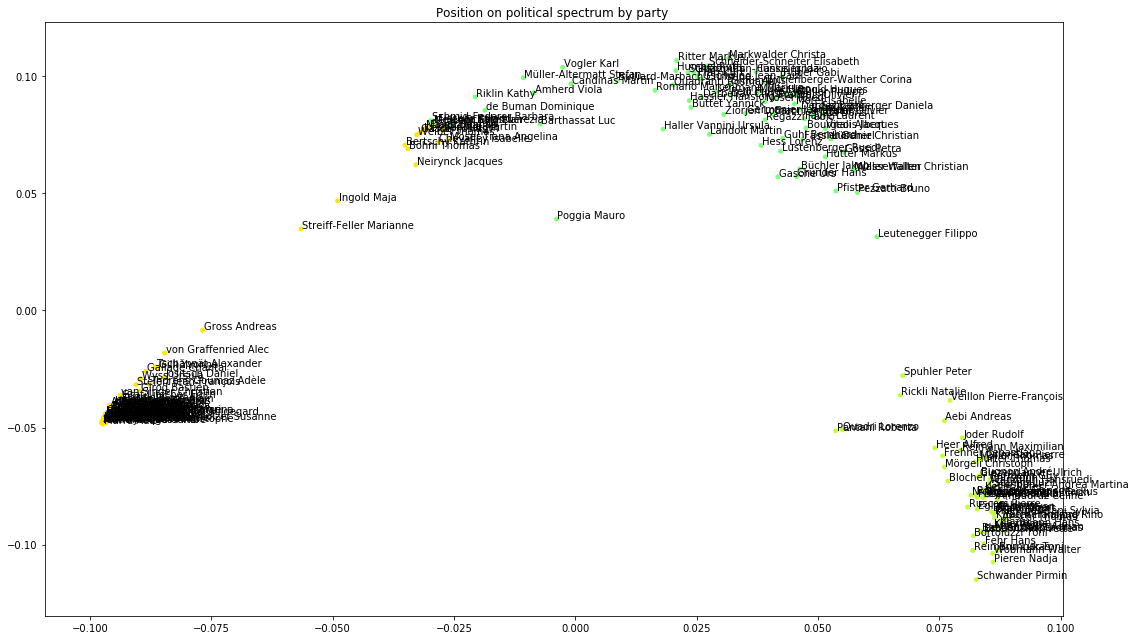

In [32]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.scatter(eigenvectors[:,1], eigenvectors[:,2], c=partition_signal, s=15, vmin=-6, vmax=6, cmap="jet")

for i, txt in enumerate(name_labels):
    ax.annotate(txt, (eigenvectors[i,1], eigenvectors[i,2]), xytext=(1,1), textcoords='offset points')
    
ax.set_title('Position on political spectrum by party ')
fig.tight_layout()

Set colorbar to whatever

In [33]:
cbar = fig.colorbar(ax.collections[0], ticks=np.linspace(6,-6,13), orientation='vertical')
cbar.ax.set_yticklabels(colorbar_labels)

[Text(1, 0, 'UDC'),
 Text(1, 0, 'PLR'),
 Text(1, 0, 'MCR'),
 Text(1, 0, 'LEGA'),
 Text(1, 0, 'PBD'),
 Text(1, 0, 'csp-ow'),
 Text(1, 0, 'PDC'),
 Text(1, 0, 'PEV'),
 Text(1, 0, 'pvl'),
 Text(1, 0, 'BastA'),
 Text(1, 0, 'PdT'),
 Text(1, 0, 'PES'),
 Text(1, 0, 'PSS')]

**Party orientation assessment**

In [36]:
legislatures=['48','49','50']
# Compute average orientation of a party per year
party_evolution_df, years = create_evolution_features_v1(legislatures)

Legislature: 48
Year: 1
(Nbr. of councillors, nbr. of votes) before filter: (202, 146)
(Nbr. of councillors, nbr. of votes) after filter: (196, 145)
1 councillors couldn't be associated to a party


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
party_to_be_plotted = ['UDC','PSS','PDC','pvl','PLR','PES','PBD']
party_colors = ['royalblue','r', 'orange', 'g', 'cyan', 'forestgreen', 'yellow']
party_color_map = dict((key, value) for (key, value) in zip(party_to_be_plotted, party_colors))

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for party in party_to_be_plotted:
    orientation = []
    domination = []
    for values_per_year in party_evolution_df:
        values_party = values_per_year[party].values
        orientation.append(values_party[0])
        domination.append(values_party[1])
    ax.plot(orientation, years, c=party_color_map[party])
plt.yticks(years, years.astype(str))

(Nbr. of councillors, nbr. of votes) before filter: (202, 146)
(Nbr. of councillors, nbr. of votes) after filter: (196, 145)
(Nbr. of councillors, nbr. of votes) before filter: (202, 604)
(Nbr. of councillors, nbr. of votes) after filter: (196, 603)
(Nbr. of councillors, nbr. of votes) before filter: (207, 411)
(Nbr. of councillors, nbr. of votes) after filter: (191, 410)
(Nbr. of councillors, nbr. of votes) before filter: (203, 528)
(Nbr. of councillors, nbr. of votes) after filter: (195, 528)
(Nbr. of councillors, nbr. of votes) before filter: (204, 419)
(Nbr. of councillors, nbr. of votes) after filter: (194, 418)
(Nbr. of councillors, nbr. of votes) before filter: (206, 473)
(Nbr. of councillors, nbr. of votes) after filter: (192, 473)
(Nbr. of councillors, nbr. of votes) before filter: (209, 358)
(Nbr. of councillors, nbr. of votes) after filter: (188, 358)
(Nbr. of councillors, nbr. of votes) before filter: (201, 306)
(Nbr. of councillors, nbr. of votes) after filter: (197, 306)


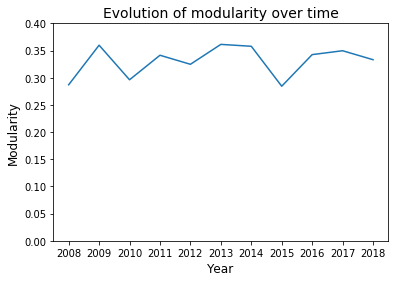

In [180]:
# Plot of modularity data
    
from matplotlib import pyplot as plt
    
modularity_data = visualize_modularity(resolution=0.6)
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] 

fig, ax = plt.subplots()
ax = plt.axes()      

plt.plot(years, modularity_data)
ax.set_title("Evolution of modularity over time",fontsize=14)
ax.set_xlabel("Year",fontsize=12)
ax.set_xticks(years)
ax.set_ylabel("Modularity",fontsize=12)
ax.set_ylim([0,0.4])
plt.show()
fig.savefig('modularity_evolution.png', dpi=300, bbox_inches = "tight")